In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from matplotlib import pyplot as plt

## Team Selection

In [3]:
# Import and check DataSet
fifa = pd.read_csv('data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High


In [4]:
# Function to clean the monetary values, erase K,M and 
def transform_money_to_number(string):
    last = len(string) - 1
    if 'K' in string:
        return float(string[1:last])*1000
    elif 'M' in string:
        return float(string[1:last])*1000000

In [5]:
# Apply to the wage and Value
fifa['Value'] = fifa['Value'].apply(transform_money_to_number)

In [6]:
fifa['Wage'].replace('[€K]','', inplace=True, regex=True)
fifa.rename(index=str, columns={"Wage": "WageInK"}, inplace=True)

In [7]:
fifa['WageInK'] = pd.to_numeric(fifa['WageInK'])

In [78]:
# Group the data by teams and doing the mean to the values
pd.set_option('display.max_columns', None)
clubs = fifa.groupby(by='Club').mean()
clubs.head()

,Unnamed: 0,ID,Age,Overall,Potential,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,LongPassing,LongShots,Marking,Penalties,Positioning,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,9665.137931,219059.413793,25.655172,65.482759,69.275862,7.494828e+05,4.172414,1539.068966,62.413793,56.896552,62.379310,63.413793,56.965517,58.517241,49.827586,45.241379,51.241379,42.620690,39.448276,15.862069,14.620690,15.448276,15.862069,16.241379,51.896552,54.827586,1.000000,17.346154,66.896552,51.103448,45.620690,53.379310,43.448276,44.000000,61.103448,55.827586,53.137931,2.206897,53.965517,61.482759,62.344828,56.172414,66.137931,51.862069,38.275862,2.931034
1. FC Heidenheim 1846,9586.535714,219734.142857,24.000000,65.607143,71.821429,9.835714e+05,4.464286,1561.071429,61.464286,57.607143,62.678571,59.714286,55.857143,58.321429,47.821429,46.928571,51.571429,44.321429,43.678571,20.142857,20.464286,20.607143,20.321429,20.000000,49.464286,45.821429,1.043478,16.782609,65.071429,53.035714,46.357143,45.892857,48.428571,47.821429,60.392857,57.321429,55.357143,2.107143,43.535714,60.500000,60.250000,44.285714,65.357143,52.607143,43.035714,2.964286
1. FC Kaiserslautern,11526.653846,220848.230769,23.846154,63.500000,70.115385,6.403846e+05,1.769231,1523.576923,65.423077,50.038462,63.192308,65.423077,56.807692,54.538462,48.846154,47.115385,55.461538,42.923077,46.153846,14.307692,14.807692,13.346154,13.884615,13.923077,52.346154,41.307692,1.000000,25.666667,62.500000,50.000000,47.269231,46.538462,49.653846,49.807692,57.846154,57.923077,56.615385,2.269231,42.000000,65.692308,60.653846,43.192308,60.961538,52.000000,43.615385,2.923077
1. FC Köln,5364.392857,208388.714286,24.321429,70.785714,76.607143,4.882500e+06,13.250000,1671.285714,63.607143,60.500000,63.321429,63.000000,61.964286,62.071429,52.250000,50.107143,58.535714,43.642857,47.571429,17.571429,17.964286,16.178571,17.642857,17.607143,55.392857,48.285714,1.200000,14.920000,66.928571,54.821429,48.785714,49.571429,49.500000,52.750000,66.892857,62.000000,56.821429,2.535714,47.535714,64.964286,62.928571,49.500000,68.607143,54.464286,45.357143,2.964286
1. FC Magdeburg,9575.884615,226487.961538,24.692308,65.692308,70.500000,8.359615e+05,5.038462,1532.192308,66.269231,55.884615,64.461538,63.115385,58.653846,59.307692,49.769231,45.153846,54.115385,43.230769,43.923077,16.115385,14.769231,14.576923,14.384615,15.423077,53.923077,48.846154,1.000000,16.208333,70.115385,54.346154,46.615385,48.615385,48.538462,47.307692,60.269231,59.115385,54.269231,2.346154,48.615385,67.153846,63.769231,49.884615,66.538462,51.000000,41.884615,2.923077


In [9]:
# Remove irrelevant values from the clubs
clubs.drop(['ID','Jersey Number', 'Jumping', 'Unnamed: 0','LongPassing','LongShots', 'ShortPassing', 'Weak Foot','GKDiving','GKKicking','GKHandling','GKPositioning','HeadingAccuracy','Curve','GKDiving', 'Stamina'],axis=1, inplace=True)

In [79]:
# Sorting clubs by overall rating
in_rep = clubs.sort_values(by='Overall', ascending=False)
in_rep.head()

,Unnamed: 0,ID,Age,Overall,Potential,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,LongPassing,LongShots,Marking,Penalties,Positioning,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Juventus,1096.92000,187675.680000,27.160000,82.160000,85.400000,2.765900e+07,130.840000,1903.20000,70.600000,65.080000,70.720000,68.000000,71.600000,78.600000,60.720000,59.720000,68.56000,54.240000,58.6400,18.32000,18.320000,17.800000,18.36000,18.680000,61.440000,53.400000,2.727273,15.045455,73.040000,65.600000,61.960000,52.200000,58.2400,60.760000,79.440000,71.280000,69.76000,3.040000,48.120,71.600000,70.080000,51.240000,72.600000,68.120000,60.480000,3.240000
Napoli,908.08000,203013.520000,25.920000,79.960000,83.320000,2.040000e+07,70.840000,1854.60000,72.120000,66.000000,71.480000,67.880000,70.360000,73.080000,60.120000,57.960000,66.64000,53.720000,55.6800,18.72000,19.280000,17.280000,18.16000,18.840000,59.320000,55.680000,1.863636,17.363636,73.040000,65.680000,56.480000,56.480000,54.7200,57.960000,76.720000,71.880000,65.04000,2.880000,52.640,72.720000,70.880000,55.600000,68.360000,66.920000,53.280000,3.120000
Inter,1330.50000,192522.666667,27.458333,79.708333,81.708333,1.941604e+07,66.583333,1835.25000,67.208333,63.958333,67.333333,63.416667,67.208333,74.000000,56.583333,61.000000,63.87500,53.750000,55.5000,22.87500,21.291667,20.291667,21.50000,21.250000,61.583333,53.291667,2.050000,15.750000,70.291667,60.875000,57.875000,54.000000,55.2500,61.875000,77.583333,67.291667,66.62500,2.750000,48.125,67.375000,68.958333,51.541667,72.916667,61.916667,55.791667,3.291667
FC Barcelona,2819.40000,207852.533333,24.366667,79.100000,85.633333,2.815333e+07,159.133333,1859.70000,68.333333,66.666667,66.333333,62.866667,72.166667,72.733333,58.766667,61.133333,67.50000,54.766667,58.1000,16.10000,15.833333,16.166667,16.00000,16.433333,63.366667,55.033333,2.172414,16.034483,70.133333,64.233333,58.833333,57.666667,57.9000,62.866667,75.600000,71.333333,67.60000,2.766667,53.400,68.433333,71.900000,55.833333,72.633333,67.500000,56.766667,3.233333
Real Madrid,3599.84375,212817.156250,24.156250,78.343750,84.812500,2.724297e+07,154.812500,1808.84375,71.562500,62.718750,70.812500,69.406250,68.343750,70.812500,58.500000,57.843750,65.90625,51.750000,54.0625,20.15625,18.625000,17.343750,18.28125,19.968750,55.937500,54.250000,2.275862,13.517241,69.125000,62.593750,57.468750,54.031250,55.1875,57.937500,74.593750,69.375000,64.84375,2.906250,50.500,70.343750,69.968750,54.187500,68.218750,64.750000,51.250000,3.156250


Text(0.5, 1.0, 'Best teams')

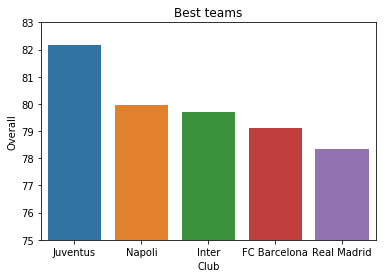

In [80]:
# Plot the 5 best teams and changing the size of the plot to see difference
lm = sns.barplot(x= in_rep.index[:5], y=in_rep.Overall[:5], data=in_rep)
lm.set(ylim=(75, 83))
lm.set_title('Best teams')

In [25]:
lm.figure.savefig("best_teams.png", transparent=True)

In [81]:
# Checking difference between the Overall and the Potential
in_rep[:5].sort_values(by='Potential', ascending=False)

,Unnamed: 0,ID,Age,Overall,Potential,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,LongPassing,LongShots,Marking,Penalties,Positioning,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Barcelona,2819.40000,207852.533333,24.366667,79.100000,85.633333,2.815333e+07,159.133333,1859.70000,68.333333,66.666667,66.333333,62.866667,72.166667,72.733333,58.766667,61.133333,67.50000,54.766667,58.1000,16.10000,15.833333,16.166667,16.00000,16.433333,63.366667,55.033333,2.172414,16.034483,70.133333,64.233333,58.833333,57.666667,57.9000,62.866667,75.600000,71.333333,67.60000,2.766667,53.400,68.433333,71.900000,55.833333,72.633333,67.500000,56.766667,3.233333
Juventus,1096.92000,187675.680000,27.160000,82.160000,85.400000,2.765900e+07,130.840000,1903.20000,70.600000,65.080000,70.720000,68.000000,71.600000,78.600000,60.720000,59.720000,68.56000,54.240000,58.6400,18.32000,18.320000,17.800000,18.36000,18.680000,61.440000,53.400000,2.727273,15.045455,73.040000,65.600000,61.960000,52.200000,58.2400,60.760000,79.440000,71.280000,69.76000,3.040000,48.120,71.600000,70.080000,51.240000,72.600000,68.120000,60.480000,3.240000
Real Madrid,3599.84375,212817.156250,24.156250,78.343750,84.812500,2.724297e+07,154.812500,1808.84375,71.562500,62.718750,70.812500,69.406250,68.343750,70.812500,58.500000,57.843750,65.90625,51.750000,54.0625,20.15625,18.625000,17.343750,18.28125,19.968750,55.937500,54.250000,2.275862,13.517241,69.125000,62.593750,57.468750,54.031250,55.1875,57.937500,74.593750,69.375000,64.84375,2.906250,50.500,70.343750,69.968750,54.187500,68.218750,64.750000,51.250000,3.156250
Napoli,908.08000,203013.520000,25.920000,79.960000,83.320000,2.040000e+07,70.840000,1854.60000,72.120000,66.000000,71.480000,67.880000,70.360000,73.080000,60.120000,57.960000,66.64000,53.720000,55.6800,18.72000,19.280000,17.280000,18.16000,18.840000,59.320000,55.680000,1.863636,17.363636,73.040000,65.680000,56.480000,56.480000,54.7200,57.960000,76.720000,71.880000,65.04000,2.880000,52.640,72.720000,70.880000,55.600000,68.360000,66.920000,53.280000,3.120000
Inter,1330.50000,192522.666667,27.458333,79.708333,81.708333,1.941604e+07,66.583333,1835.25000,67.208333,63.958333,67.333333,63.416667,67.208333,74.000000,56.583333,61.000000,63.87500,53.750000,55.5000,22.87500,21.291667,20.291667,21.50000,21.250000,61.583333,53.291667,2.050000,15.750000,70.291667,60.875000,57.875000,54.000000,55.2500,61.875000,77.583333,67.291667,66.62500,2.750000,48.125,67.375000,68.958333,51.541667,72.916667,61.916667,55.791667,3.291667


## Player selection

In [28]:
# Selecting only the best team, Juventus
juve = fifa[fifa['Club']== 'Juventus'] 

In [76]:
juve.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,CAM,CB,CDM,CF,CM,Composure,Contract Valid Until,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Joined,Jumping,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Loaned From,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,Reactions,Real Face,Release Clause,ST,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate,RealPos
0,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405,2228,89,63,87,70,94,C. Ronaldo,88+3,53+3,61+3,90+3,81+3,95,2022,84,81,88,76,94,7,11,15,14,11,89,29,5.0,7.0,"Jul 10, 2018",95,88+3,61+3,53+3,81+3,61+3,90+3,88+3,91+3,89+3,65+3,NaN,77,93,28,85,LW,95,Right,88+3,61+3,53+3,81+3,61+3,90+3,88+3,91+3,89+3,65+3,96,Yes,€127.1M,91+3,81,95,5,23,91,88,31,79,82,87,4,High/ Low,DEL
1,16,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,89000000.0,205,2092,87,48,91,85,92,Normal,87+3,45+3,58+3,86+3,79+3,84,2022,82,88,92,88,84,5,4,4,5,8,68,32,3.0,10.0,"Jul 1, 2015",75,87+3,56+3,45+3,79+3,58+3,86+3,86+3,83+3,87+3,62+3,NaN,75,88,23,86,RW,84,Left,87+3,56+3,45+3,79+3,58+3,86+3,86+3,83+3,87+3,62+3,86,Yes,€153.5M,83+3,87,82,4,20,83,80,20,65,87,88,3,High/ Medium,DEL
2,25,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,27000000.0,215,1839,63,92,54,55,57,Normal,54+3,86+3,76+3,54+3,60+3,84,2020,58,60,58,31,33,3,3,2,4,3,84,88,4.0,3.0,"Jul 1, 2005",89,54+3,77+3,86+3,60+3,76+3,54+3,56+3,57+3,54+3,74+3,NaN,59,49,93,50,LCB,28,Left,54+3,77+3,86+3,60+3,76+3,54+3,56+3,57+3,54+3,74+3,82,Yes,€44.6M,57+3,59,78,2,90,72,65,93,89,50,45,2,Medium/ High,DEF
3,65,191043,Alex Sandro,27,https://cdn.sofifa.org/players/4/19/191043.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,36500000.0,160,2198,97,55,93,91,91,Normal,84+3,53+3,63+3,83+3,78+3,84,2022,84,84,92,78,67,13,15,9,12,5,50,48,3.0,11.0,"Jul 1, 2018",61,84+3,64+3,53+3,78+3,63+3,83+3,84+3,77+3,85+3,69+3,NaN,68,80,45,77,LM,76,Left,84+3,64+3,53+3,78+3,63+3,83+3,84+3,77+3,85+3,69+3,84,Yes,€76.7M,77+3,84,86,5,34,93,78,38,63,84,76,3,High/ Medium,DEF
4,66,190483,Douglas Costa,27,https://cdn.sofifa.org/players/4/19/190483.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,46500000.0,175,2111,73,57,75,72,82,Lean,82+3,60+3,66+3,83+3,79+3,83,2021,79,81,75,59,87,6,7,11,14,14,82,58,4.0,25.0,"Aug 10, 2008",81,82+3,66+3,60+3,79+3,66+3,83+3,81+3,82+3,81+3,68+3,NaN,72,80,44,60,RCM,93,Right,82+3,66+3,60+3,79+3,66+3,83+3,81+3,82+3,81+3,68+3,92,Yes,€75.9M,82+3,83,78,3,44,75,87,41,68,85,84,4,High/ High,CENT


In [32]:
# Adding real possitions
RealPos = ['DEL','DEL','DEF','DEF', 'CENT','DEF','CENT','NaN','CENT','CENT','POR','CENT','POR','DEL','DEF','DEL','DEF','DEF','CENT','DEF','DEF','CENT','DEL','POR','DEF']
juve['RealPos'] = RealPos

In [56]:
# Selecting only the defense
defense = juve[juve['RealPos']=='DEF']

In [62]:
defense.reset_index(drop=True, inplace=True)

In [49]:
# Selecting the best players according to their skills
juve_best = juve.iloc[[0,1,2,3,4,5,6,7,9,10,13]]

In [50]:
# Comparing the mean of the overall rating for the whole team and the best players
juve_best['Overall'].mean()

86.81818181818181

In [51]:
juve['Overall'].mean()

82.16

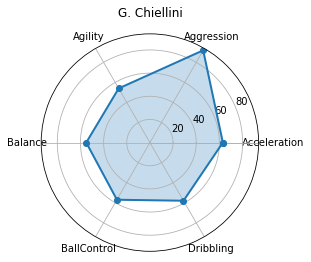

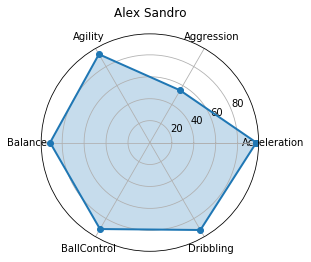

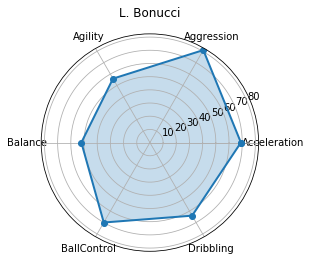

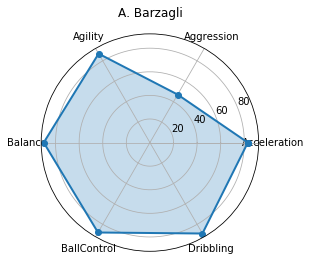

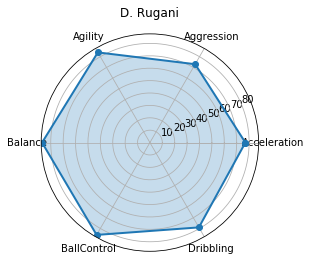

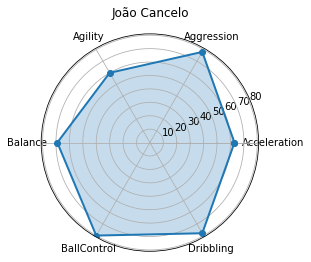

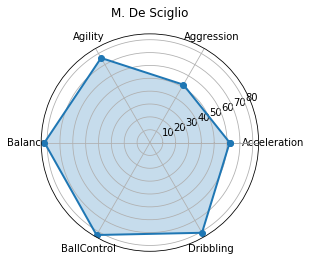

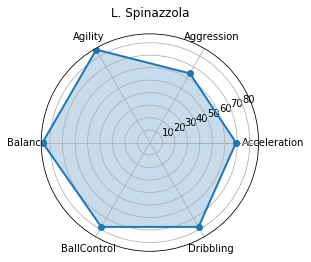

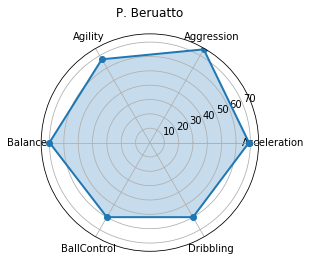

In [75]:
# Generating and saving a radar chart for each defense player
for i in range(len(defense)):
    labels=np.array(['Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl','Dribbling'])
    stats= defense.loc[i,labels].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(defense.loc[i,"Name"])
    name = defense.loc[i,"Name"]
    ax.grid(True)
    plt.savefig(f"{name}_plot.png")

## Teams with most valuable players

In [92]:
fifa.groupby('Club').mean().sort_values(by='Value', ascending=False)[['Value']][:5]

,Value
Club,
FC Barcelona,2.815333e+07
Juventus,2.765900e+07
Real Madrid,2.724297e+07
FC Bayern München,2.421121e+07
Manchester City,2.282439e+07


## Teams with higher wages

In [93]:
fifa.groupby('Club').mean().sort_values(by='WageInK', ascending=False)[['WageInK']][:5]

,WageInK
Club,
FC Barcelona,159.133333
Real Madrid,154.812500
Juventus,130.840000
Manchester City,112.363636
Manchester United,104.969697


## Biggest difference between Overall and Potential

In [95]:
# Calculating difference
OverVsPot = []
for i in range(len(fifa)):
    OverVsPot.append(fifa.iloc[i]['Potential']-fifa.iloc[i]['Overall'])

In [98]:
# Adding the difference as a column 
fifa['OverVsPot'] = OverVsPot

In [103]:
fifa.sort_values(by='OverVsPot', ascending=False)[:1]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,CAM,CB,CDM,CF,CM,Composure,Contract Valid Until,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Joined,Jumping,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Loaned From,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,Reactions,Real Face,Release Clause,ST,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate,OverVsPot
15953,16277,244592,J. von Moos,17,https://cdn.sofifa.org/players/4/19/244592.png,Switzerland,https://cdn.sofifa.org/flags/47.png,58,84,FC Basel 1893,https://cdn.sofifa.org/teams/2/light/896.png,280000.0,2,1421,79,61,68,67,25,Normal,50+2,55+2,51+2,51+2,48+2,46,2019,61,60,56,61,46,11,8,10,9,10,50,48,1.0,9.0,"Aug 15, 2017",70,50+2,56+2,55+2,48+2,51+2,51+2,53+2,53+2,53+2,55+2,NaN,55,54,59,46,LWB,54,Left,50+2,56+2,55+2,48+2,51+2,51+2,53+2,53+2,53+2,55+2,54,No,€146K,53+2,48,60,2,58,86,63,53,74,50,48,2,High/ Medium,26
